In [124]:
!pip install pandas 


In [150]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

In [151]:
!pip install folium geocoder vega_datasets

In [152]:
import folium # pip install folium
from folium import plugins
# import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
# import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

In [153]:

import matplotlib.pyplot as plt
import geopandas as gpd
import math
import seaborn as sns


In [154]:

from folium import Marker


In [155]:

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [229]:
df = pd.read_csv('../data/MunE19_c.csv', sep=';', encoding='ISO-8859-1')

In [230]:
df.head(10)

,TH,Cod Comarca,Cod Municipio,Ámbito,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,...,CPE,MIEL,IZQP,PCPE-PCPC-PCPA,PODEMOS-IU,JUNTS,IGRE,VOLT,CV-EC,CEX-CREX-PREX
0,Araba-Alava,1,59,VITORIA-GASTEIZ,190184,119287,798.0,118489,908.0,117581,...,126,49,57,153,14985,553,49,113,537,79
1,Araba-Alava,2,1,ALEGRÍA-DULANTZI,2016,1326,15.0,1311,25.0,1286,...,1,1,0,2,175,7,0,1,4,0
2,Araba-Alava,2,3,ARAMAIO,1176,835,2.0,833,4.0,829,...,0,0,0,1,50,6,0,0,1,0
3,Araba-Alava,2,6,ARMIÑÓN,176,124,2.0,122,3.0,119,...,1,0,0,0,24,0,0,0,0,0
4,Araba-Alava,2,8,ARRATZUA-UBARRUNDIA,803,531,2.0,529,4.0,525,...,0,0,0,0,45,3,0,0,1,0
5,Araba-Alava,2,9,ASPARRENA,1266,909,8.0,901,5.0,896,...,0,0,0,0,91,21,0,0,10,0
6,Araba-Alava,2,11,BAÑOS DE EBRO/MAÑUETA,228,196,5.0,191,5.0,186,...,0,0,0,0,9,0,0,0,0,0
7,Araba-Alava,2,13,BARRUNDIA,712,474,5.0,469,1.0,468,...,3,0,0,0,40,8,0,0,1,0
8,Araba-Alava,2,14,BERANTEVILLA,371,299,8.0,291,5.0,286,...,1,0,0,0,29,0,0,0,2,0
9,Araba-Alava,2,16,BERNEDO,419,244,NaN,244,7.0,237,...,0,0,0,0,17,1,0,0,2,0


In [231]:
type(df)

pandas.core.frame.DataFrame

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TH                 254 non-null    object 
 1   Cod Comarca        254 non-null    int64  
 2   Cod Municipio      254 non-null    int64  
 3   Ámbito             254 non-null    object 
 4   Censo              254 non-null    int64  
 5   Votantes           254 non-null    int64  
 6   Nulos              231 non-null    float64
 7   Válidos            254 non-null    int64  
 8   Blancos            240 non-null    float64
 9   Votos Candidatura  254 non-null    int64  
 10  Abstención         254 non-null    int64  
 11  PSE-PSOE           254 non-null    int64  
 12  PP                 254 non-null    int64  
 13  PH                 254 non-null    int64  
 14  PCTE / ELAK        254 non-null    int64  
 15  PACMA/ATTKAA       254 non-null    int64  
 16  PUM+J              254 non

In [233]:
df.describe(include="all")

,TH,Cod Comarca,Cod Municipio,Ámbito,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,...,CPE,MIEL,IZQP,PCPE-PCPC-PCPA,PODEMOS-IU,JUNTS,IGRE,VOLT,CV-EC,CEX-CREX-PREX
count,254,254.00000,254.000000,254,254.000000,254.000000,231.000000,254.000000,240.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
unique,3,NaN,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bizkaia,NaN,NaN,VITORIA-GASTEIZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,113,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.11811,135.586614,NaN,7063.763780,4441.980315,27.891775,4416.610236,37.283333,4381.381890,...,3.350394,0.767717,1.539370,4.681102,488.641732,19.972441,1.078740,2.740157,13.003937,1.110236
std,NaN,10.42884,271.128454,NaN,24179.043116,15045.429736,73.634712,14979.595598,113.581496,14869.315708,...,15.762543,3.618844,6.002999,20.347298,1832.839610,76.173372,4.254003,13.276454,59.247021,5.632666
min,NaN,1.00000,1.000000,NaN,88.000000,52.000000,1.000000,52.000000,1.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.00000,23.000000,NaN,400.750000,296.000000,3.000000,292.000000,4.000000,290.250000,...,0.000000,0.000000,0.000000,0.000000,14.250000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,3.00000,47.000000,NaN,1156.000000,848.500000,8.000000,845.500000,9.000000,837.500000,...,0.000000,0.000000,0.000000,0.000000,53.500000,4.000000,0.000000,0.000000,2.000000,0.000000
75%,NaN,4.00000,71.000000,NaN,4879.000000,3100.500000,23.000000,3060.750000,31.000000,3033.000000,...,2.000000,0.000000,1.000000,2.000000,275.500000,12.750000,1.000000,1.000000,6.000000,1.000000


In [235]:
df.loc[df["Nulos"].isna()]
df.loc[df["Nulos"].isna(), "Nulos"] = 0
df.head()

,TH,Cod Comarca,Cod Municipio,Ámbito,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,...,CPE,MIEL,IZQP,PCPE-PCPC-PCPA,PODEMOS-IU,JUNTS,IGRE,VOLT,CV-EC,CEX-CREX-PREX
0,Araba-Alava,1,59,VITORIA-GASTEIZ,190184,119287,798.0,118489,908.0,117581,...,126,49,57,153,14985,553,49,113,537,79
1,Araba-Alava,2,1,ALEGRÍA-DULANTZI,2016,1326,15.0,1311,25.0,1286,...,1,1,0,2,175,7,0,1,4,0
2,Araba-Alava,2,3,ARAMAIO,1176,835,2.0,833,4.0,829,...,0,0,0,1,50,6,0,0,1,0
3,Araba-Alava,2,6,ARMIÑÓN,176,124,2.0,122,3.0,119,...,1,0,0,0,24,0,0,0,0,0
4,Araba-Alava,2,8,ARRATZUA-UBARRUNDIA,803,531,2.0,529,4.0,525,...,0,0,0,0,45,3,0,0,1,0


In [236]:
df.loc[df["Blancos"].isna()]
df.loc[df["Blancos"].isna(), "Blancos"] = 0
df.head()

,TH,Cod Comarca,Cod Municipio,Ámbito,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,...,CPE,MIEL,IZQP,PCPE-PCPC-PCPA,PODEMOS-IU,JUNTS,IGRE,VOLT,CV-EC,CEX-CREX-PREX
0,Araba-Alava,1,59,VITORIA-GASTEIZ,190184,119287,798.0,118489,908.0,117581,...,126,49,57,153,14985,553,49,113,537,79
1,Araba-Alava,2,1,ALEGRÍA-DULANTZI,2016,1326,15.0,1311,25.0,1286,...,1,1,0,2,175,7,0,1,4,0
2,Araba-Alava,2,3,ARAMAIO,1176,835,2.0,833,4.0,829,...,0,0,0,1,50,6,0,0,1,0
3,Araba-Alava,2,6,ARMIÑÓN,176,124,2.0,122,3.0,119,...,1,0,0,0,24,0,0,0,0,0
4,Araba-Alava,2,8,ARRATZUA-UBARRUNDIA,803,531,2.0,529,4.0,525,...,0,0,0,0,45,3,0,0,1,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TH                 254 non-null    object 
 1   Cod Comarca        254 non-null    int64  
 2   Cod Municipio      254 non-null    int64  
 3   Ámbito             254 non-null    object 
 4   Censo              254 non-null    int64  
 5   Votantes           254 non-null    int64  
 6   Nulos              254 non-null    float64
 7   Válidos            254 non-null    int64  
 8   Blancos            254 non-null    float64
 9   Votos Candidatura  254 non-null    int64  
 10  Abstención         254 non-null    int64  
 11  PSE-PSOE           254 non-null    int64  
 12  PP                 254 non-null    int64  
 13  Cs                 254 non-null    int64  
 14  VOX                254 non-null    int64  
 15  EAJ-PNV... (E19)   254 non-null    int64  
 16  EH BILDU... (E19)  254 non

In [61]:
df["TH"].unique()

array(['Araba-Alava', 'Bizkaia', 'Gipuzkoa'], dtype=object)

In [62]:
df["Cod Municipio"].unique()

array([ 59,   1,   3,   6,   8,   9,  11,  13,  14,  16,  17,  18,  19,
        20,  21,  22,  23,  27,  28,  30,  31,  32,  33,  34,  37,  39,
        41,  43,  44,  46,  47,  49,  51,  52,  53,  54,  55,  56,  57,
        58,  60,  61,  62,  63, 901, 902,   2,   4,  10,  36,  42, 999,
        45,  71,  78,  80,  82,  83,  84,  86,  87,  90,  96, 912, 913,
         5,  15,  24,  25,  26,  29,  50,  65,  72,  74,  75,  88,  91,
        92,  93,  94,  95,  97, 910,   7,  12,  35,  38,  40,  48,  64,
        66,  67,  68,  69,  70,  73,  76,  77,  79,  81,  85,  89, 903,
       904, 905, 906, 907, 908, 909, 911, 914, 915], dtype=int64)

In [63]:
#ambito por territorio historico
df.groupby(["TH", "Ámbito"]).mean()

Cod Comarca  Cod Municipio   Censo  Votantes  \
TH          Ámbito                                                              
Araba-Alava AGURAIN/SALVATIERRA          2.0           51.0  3560.0    2379.0   
            ALEGRÍA-DULANTZI             2.0            1.0  2016.0    1326.0   
            AMURRIO                      3.0            2.0  8047.0    5753.0   
            ARAMAIO                      2.0            3.0  1176.0     835.0   
            ARMIÑÓN                      2.0            6.0   176.0     124.0   
...                                      ...            ...     ...       ...   
Gipuzkoa    ZERAIN                       3.0           26.0   208.0     194.0   
            ZESTOA                       4.0           27.0  2760.0    1947.0   
            ZIZURKIL                     3.0           28.0  2257.0    1508.0   
            ZUMAIA                       4.0           81.0  7684.0    5336.0   
            ZUMARRAGA                    3.0           80.0  7723.0    5121.0   

                                 Nulos  Válidos  Blancos  Votos Candidatura  \
TH          Ámbito                                                            
Araba-Alava AGURAIN/SALVATIERRA   12.0   2367.0     25.0             2342.0   
            ALEGRÍA-DULANTZI      15.0   1311.0     25.0             1286.0   
            AMURRIO               57.0   5696.0     62.0             5634.0   
            ARAMAIO                2.0    833.0      4.0              829.0   
            ARMIÑÓN                2.0    122.0      3.0              119.0   
...                                ...      ...      ...                ...   
Gipuzkoa    ZERAIN                 6.0    188.0      4.0              184.0   
            ZESTOA                12.0   1935.0     18.0             1917.0   
            ZIZURKIL               4.0   1504.0      9.0             1495.0   
            ZUMAIA                24.0   5312.0     43.0             5269.0   
            ZUMARRAGA             51.0   5070.0     75.0             4995.0   

                                 Abstención  PSE-PSOE     PP    Cs   VOX  \
TH          Ámbito                                                         
Araba-Alava AGURAIN/SALVATIERRA      1181.0     240.0   83.0  37.0  12.0   
            ALEGRÍA-DULANTZI          690.0     257.0   73.0  31.0  39.0   
            AMURRIO                  2294.0     784.0  254.0  69.0  83.0   
            ARAMAIO                   341.0      26.0    1.0   0.0   5.0   
            ARMIÑÓN                    52.0      19.0   17.0   6.0   9.0   
...                                     ...       ...    ...   ...   ...   
Gipuzkoa    ZERAIN                     14.0       1.0    0.0   0.0   0.0   
            ZESTOA                    813.0      82.0    8.0   3.0   3.0   
            ZIZURKIL                  749.0     246.0   34.0  13.0   5.0   
            ZUMAIA                   2348.0     659.0   81.0  50.0  21.0   
            ZUMARRAGA                2602.0    1702.0  190.0  81.0  28.0   

                                 EAJ-PNV... (E19)  EH BILDU... (E19)  \
TH          Ámbito                                                     
Araba-Alava AGURAIN/SALVATIERRA             915.0              852.0   
            ALEGRÍA-DULANTZI                396.0              264.0   
            AMURRIO                        2220.0             1549.0   
            ARAMAIO                         243.0              491.0   
            ARMIÑÓN                          29.0               11.0   
...                                           ...                ...   
Gipuzkoa    ZERAIN                           77.0               99.0   
            ZESTOA                          748.0              930.0   
            ZIZURKIL                        424.0              655.0   
            ZUMAIA                         1801.0             2159.0   
            ZUMARRAGA                      1269.0             1060.0   

                         

In [65]:
df.describe()

,Cod Comarca,Cod Municipio,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,Abstención,PSE-PSOE,PP,Cs,VOX,EAJ-PNV... (E19),EH BILDU... (E19),PODEMOS-IU,JUNTS
count,254.00000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.00000,254.000000,254.000000,254.000000,254.000000
mean,4.11811,135.586614,7063.763780,4441.980315,25.366142,4416.610236,35.228346,4381.381890,2621.783465,838.114173,284.543307,119.937008,54.03937,1498.334646,972.192913,488.641732,19.972441
std,10.42884,271.128454,24179.043116,15045.429736,70.664518,14979.595598,110.722899,14869.315708,9427.066025,3319.889109,1536.447624,581.849379,279.93432,4848.783730,2328.328843,1832.839610,76.173372
min,1.00000,1.000000,88.000000,52.000000,0.000000,52.000000,0.000000,52.000000,13.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2.000000,0.000000,0.000000
25%,2.00000,23.000000,400.750000,296.000000,2.000000,292.000000,3.000000,290.250000,87.250000,11.000000,3.000000,2.000000,0.00000,119.750000,110.000000,14.250000,1.000000
50%,3.00000,47.000000,1156.000000,848.500000,6.000000,845.500000,8.000000,837.500000,292.500000,62.000000,25.000000,9.500000,3.00000,335.500000,289.000000,53.500000,4.000000
75%,4.00000,71.000000,4879.000000,3100.500000,21.000000,3060.750000,28.750000,3033.000000,1546.000000,329.250000,83.750000,45.500000,15.75000,1221.250000,880.750000,275.500000,12.750000
max,99.00000,999.000000,273387.000000,168162.000000,798.000000,167588.000000,1242.000000,166346.000000,105225.000000,32837.000000,16792.000000,6112.000000,2856.00000,62418.000000,22307.000000,19958.000000,790.000000


# RELACION DEL CENSO DE VOTANTES Y CANTIDAD DE PERSONAS QUE ASISTIERON

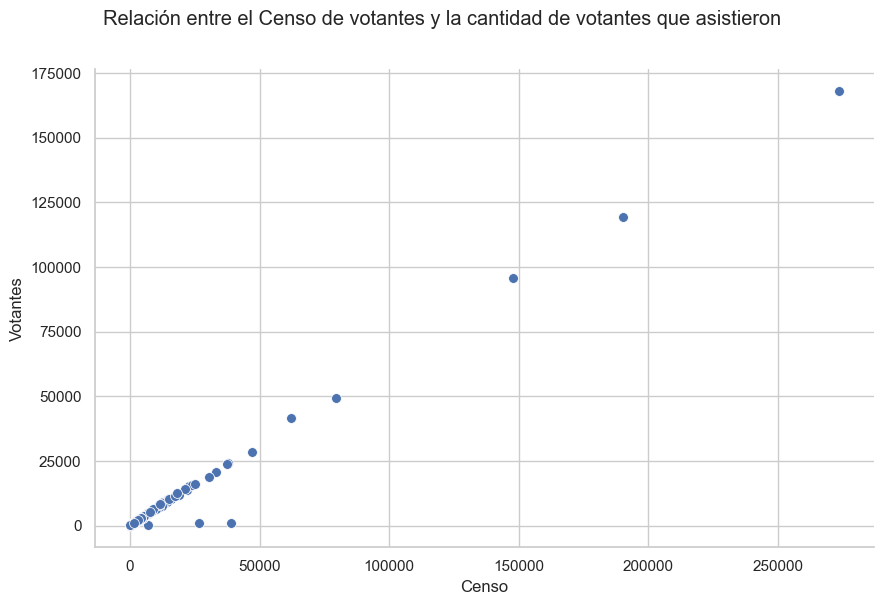

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt



# Configuración para mejorar la estética de las gráficas
sns.set(style="whitegrid")

# Creando el gráfico de relación con relplot
g = sns.relplot(data=df,
                x="Censo",
                y="Votantes",
                kind="scatter",
                height=6,
                aspect=1.5)

# Estableciendo título
g.fig.suptitle('Relación entre el Censo de votantes y la cantidad de votantes que asistieron',
               va='baseline',
               ha='center')

# Estableciendo títulos para las etiquetas de ejes
g.set_axis_labels('Censo', 'Votantes')



# Ajustando el tamaño de los puntos
g.map(sns.scatterplot, 'Censo', 'Votantes', s=50)

# Mostrando el gráfico
plt.show()


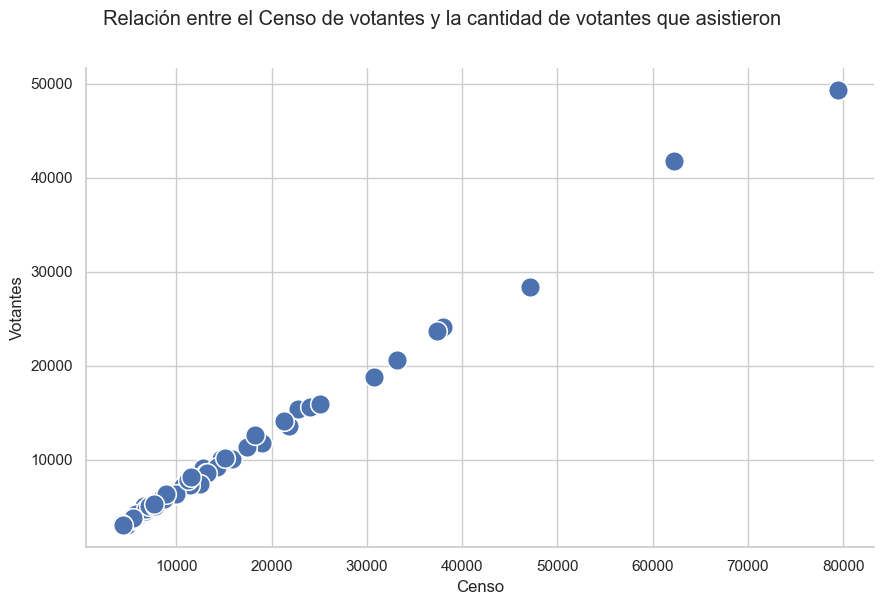

In [261]:
# Filtrando los datos para el rango específico
df_filtered = df[(df['Votantes'] >= 3000) & (df['Votantes'] <= 75000)]

#Configuración para mejorar la estética de las gráficas
sns.set(style="whitegrid")

# Creando el gráfico de relación con relplot
g = sns.relplot(data=df_filtered,
                x="Censo",
                y="Votantes",
                kind="scatter",
                height=6,
                aspect=1.5)

# Estableciendo título
g.fig.suptitle('Relación entre el Censo de votantes y la cantidad de votantes que asistieron',
               va='baseline',
               ha='center')

# Estableciendo títulos para las etiquetas de ejes
g.set_axis_labels('Censo', 'Votantes');

# Ajustando los límites de los ejes para centrarse en el rango de interés
#g.ax.set_xlim(0, df_filtered['Censo'].max() + 4000)  # Añade un pequeño margen al máximo valor
#g.ax.set_ylim(3000, 75000)

# Ajustando el tamaño de los puntos
g.map(sns.scatterplot, 'Censo', 'Votantes', s=200)

# Tendencia de participación

c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


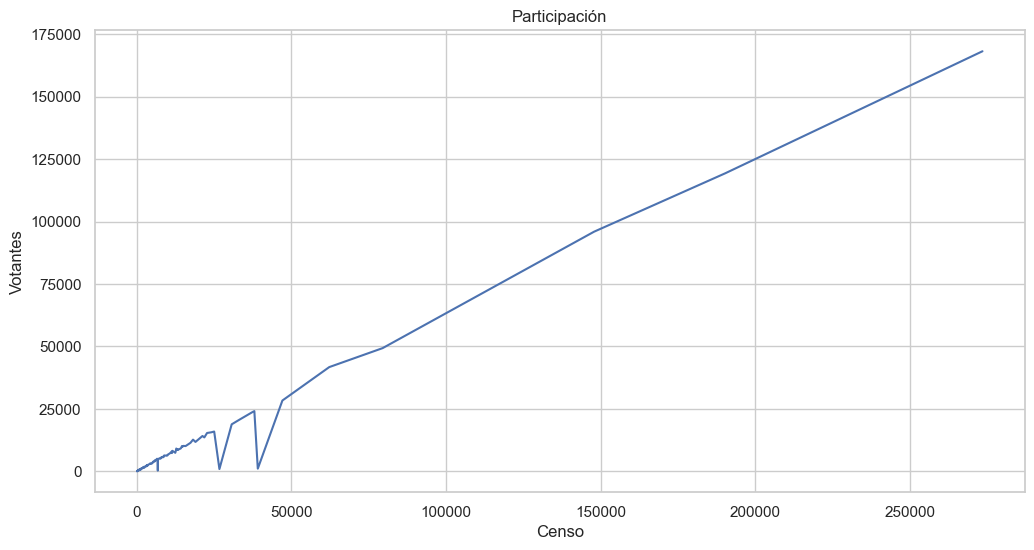

In [255]:
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by='Censo')
sns.lineplot(data=df_sorted, x='Censo', y='Votantes')
plt.title('Participación')
plt.xlabel('Censo')
plt.ylabel('Votantes')
plt.show()

# VOTOS POR DISTINTAS CANDIDATURAS

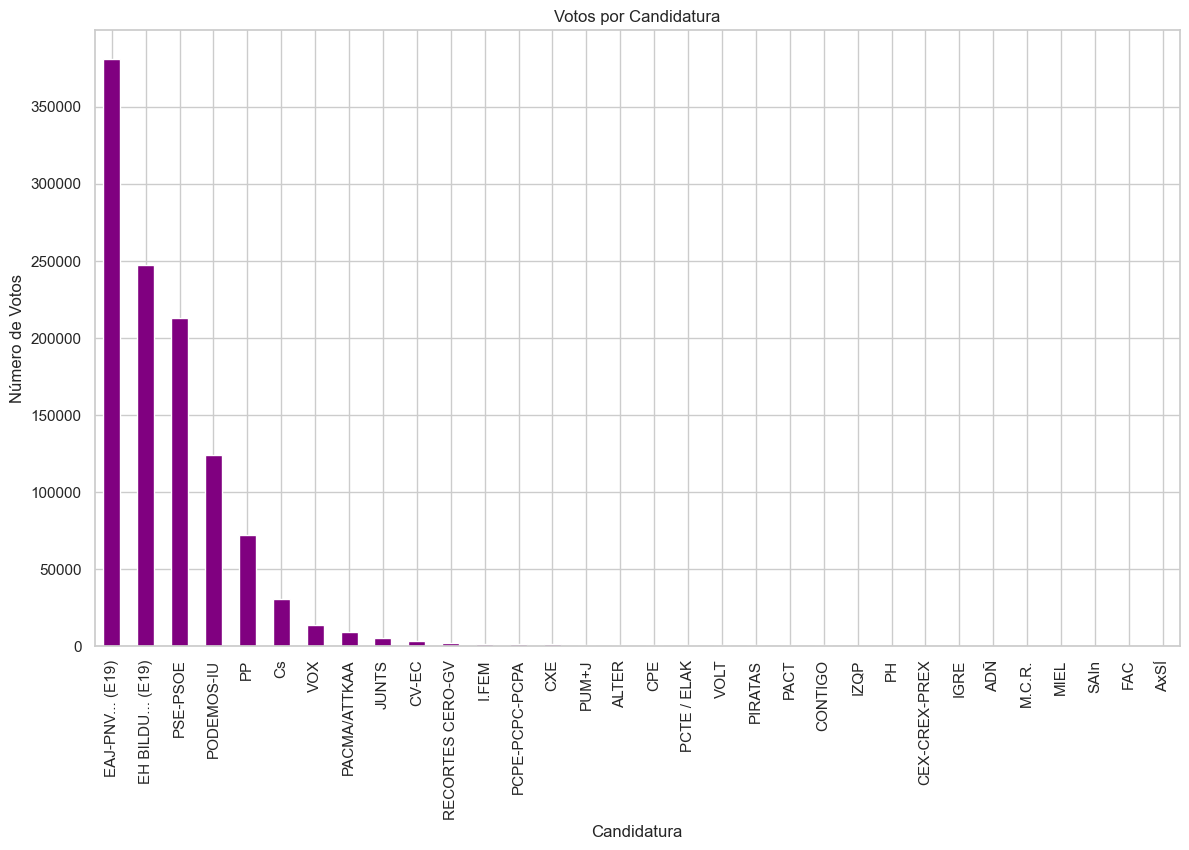

In [262]:
# Suma de votos por candidatura
votos_por_candidatura = df.iloc[:, 11:].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
votos_por_candidatura.plot(kind='bar', color='purple')
plt.title('Votos por Candidatura')
plt.xlabel('Candidatura')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.show()

c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


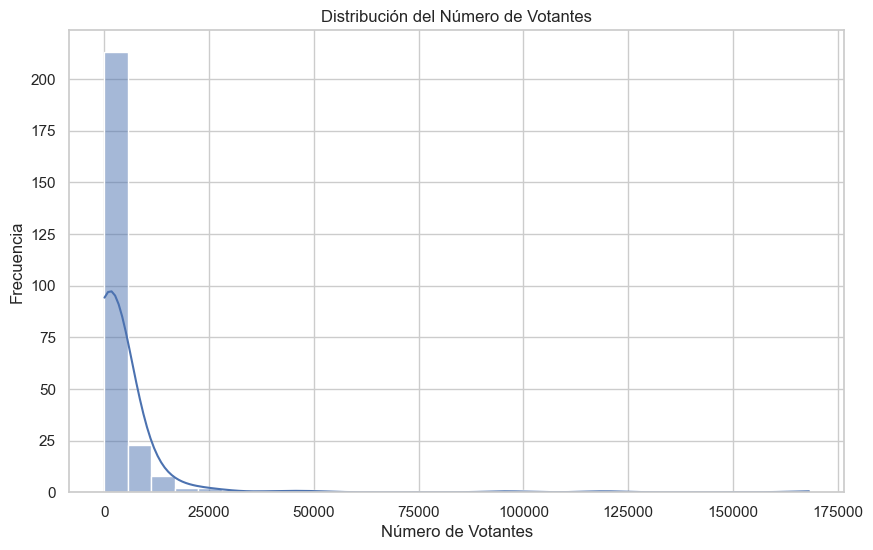

In [248]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Votantes'], bins=30, kde=True)
plt.title('Distribución del Número de Votantes')
plt.xlabel('Número de Votantes')
plt.ylabel('Frecuencia')
plt.show()


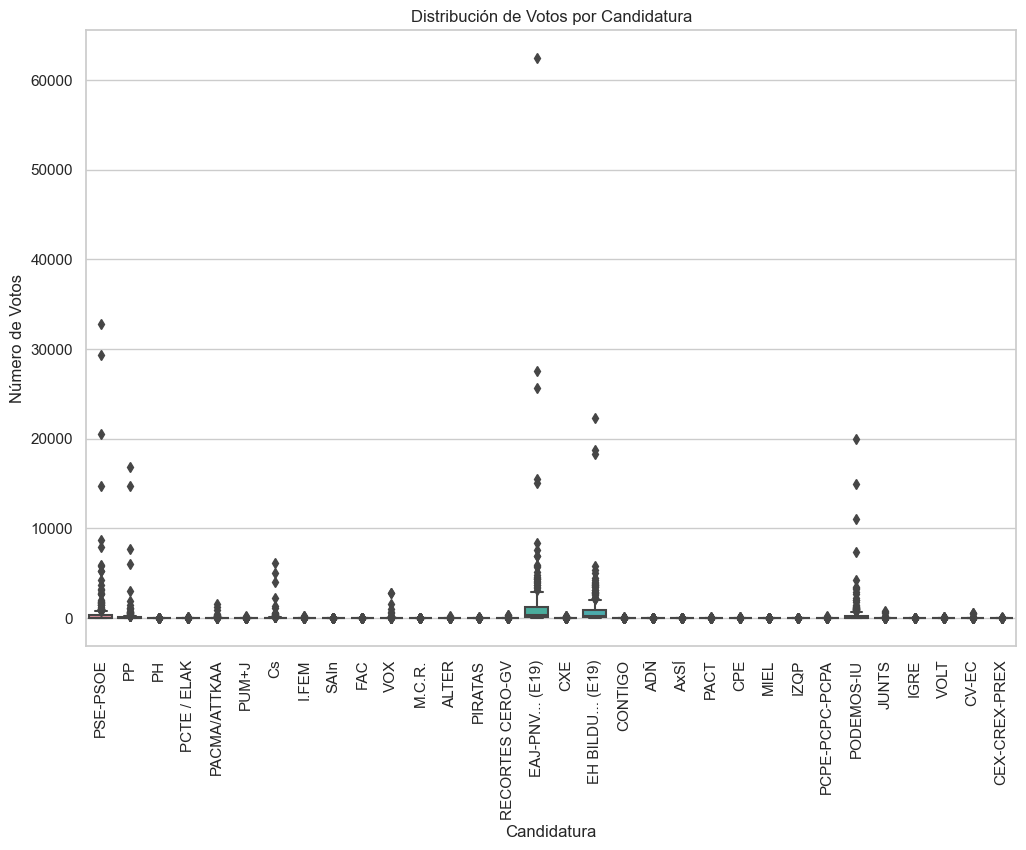

In [263]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 11:])
plt.title('Distribución de Votos por Candidatura')
plt.xlabel('Candidatura')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.show()

In [238]:
#VUELVO A LLAMAR LOS DATOS PERO SOLO PARA MOSTRAR LAS COLUMNAS ESPECIFICAS CON PARTIDOS ESPECIFICOS SELECCIONADOS
df2 = pd.read_csv('../data/MunE19_c.csv', sep=';', encoding='ISO-8859-1', usecols=['TH','Cod Comarca','Cod Municipio','Ámbito','Censo','Votantes','Nulos','Válidos','Blancos','Votos Candidatura','Abstención','PSE-PSOE', 'PP', 'Cs','VOX', 'EAJ-PNV... (E19)', 'EH BILDU... (E19)','PODEMOS-IU','JUNTS'])

In [265]:
df2.loc[df2["Nulos"].isna()]
df2.loc[df2["Nulos"].isna(), "Nulos"] = 0
df2.head(2)

,TH,Cod Comarca,Cod Municipio,Ámbito,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,Abstención,PSE-PSOE,PP,Cs,VOX,EAJ-PNV... (E19),EH BILDU... (E19),PODEMOS-IU,JUNTS
0,Araba-Alava,1,59,VITORIA-GASTEIZ,190184,119287,798.0,118489,908.0,117581,70897,29360,16792,5042,2784,25666,18267,14985,553
1,Araba-Alava,2,1,ALEGRÍA-DULANTZI,2016,1326,15.0,1311,25.0,1286,690,257,73,31,39,396,264,175,7


In [264]:
df2.loc[df2["Blancos"].isna()]
df2.loc[df2["Blancos"].isna(), "Blancos"] = 0
df2.head(2)

,TH,Cod Comarca,Cod Municipio,Ámbito,Censo,Votantes,Nulos,Válidos,Blancos,Votos Candidatura,Abstención,PSE-PSOE,PP,Cs,VOX,EAJ-PNV... (E19),EH BILDU... (E19),PODEMOS-IU,JUNTS
0,Araba-Alava,1,59,VITORIA-GASTEIZ,190184,119287,798.0,118489,908.0,117581,70897,29360,16792,5042,2784,25666,18267,14985,553
1,Araba-Alava,2,1,ALEGRÍA-DULANTZI,2016,1326,15.0,1311,25.0,1286,690,257,73,31,39,396,264,175,7


In [266]:
df2.columns.values[11:20]

array(['PSE-PSOE', 'PP', 'Cs', 'VOX', 'EAJ-PNV... (E19)',
       'EH BILDU... (E19)', 'PODEMOS-IU', 'JUNTS'], dtype=object)

<Axes: >

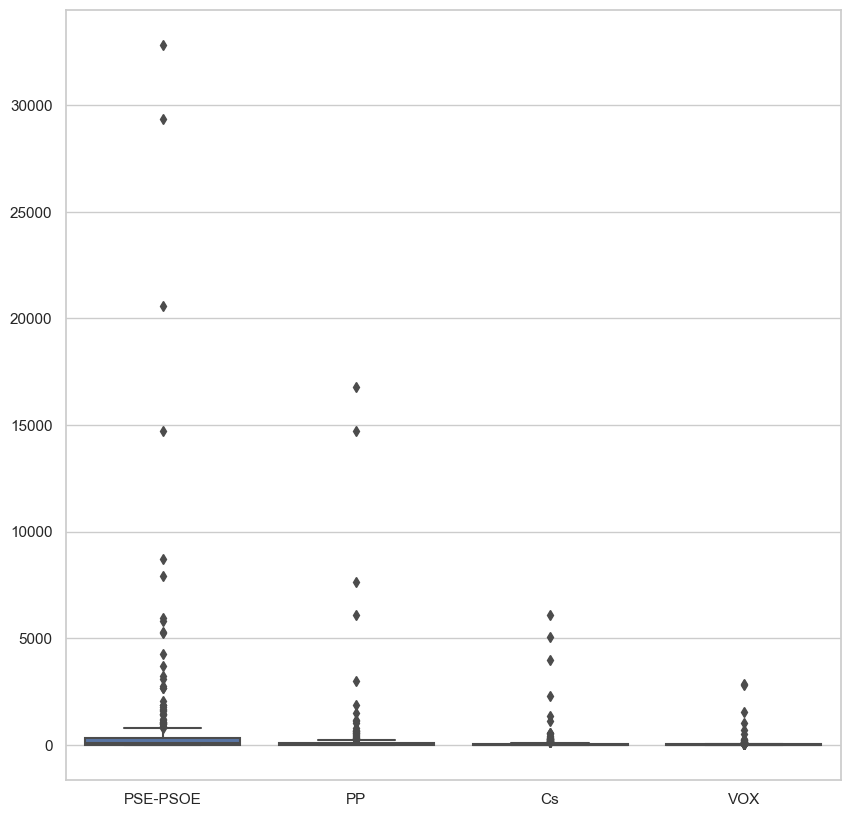

In [267]:
plt.figure(figsize=(10,10))
#plt.figure(figsize=(12, 8))
sns.boxplot(data=df2[df2.columns.values[11:15]])

<Axes: >

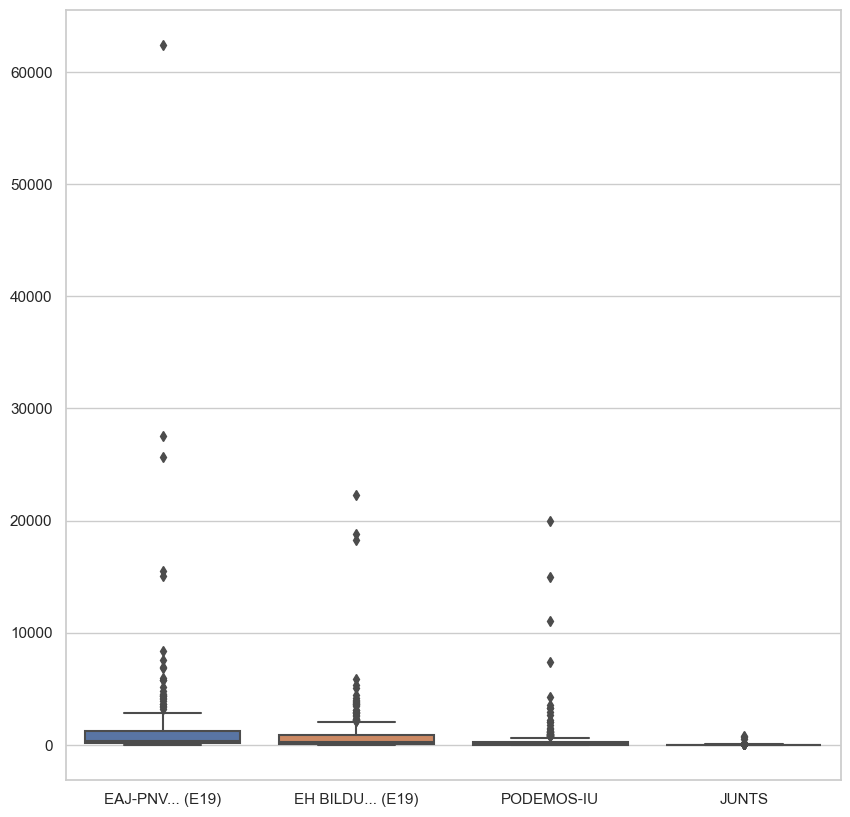

In [268]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df2[df2.columns.values[15:20]])

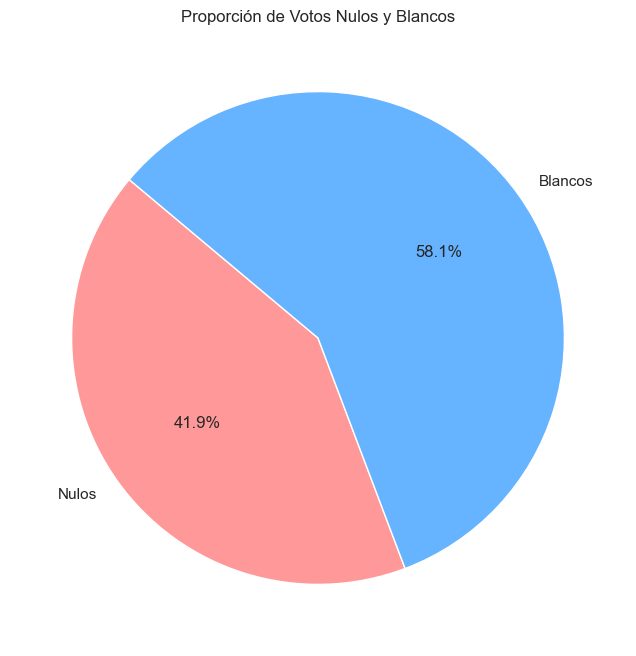

In [269]:
votos_nulos_blancos = df[['Nulos', 'Blancos']].sum()

plt.figure(figsize=(8, 8))
plt.pie(votos_nulos_blancos, labels=votos_nulos_blancos.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proporción de Votos Nulos y Blancos')
plt.show()



#  Distribucion de votos por partido politico en cada territorio historico

#Bizkaia

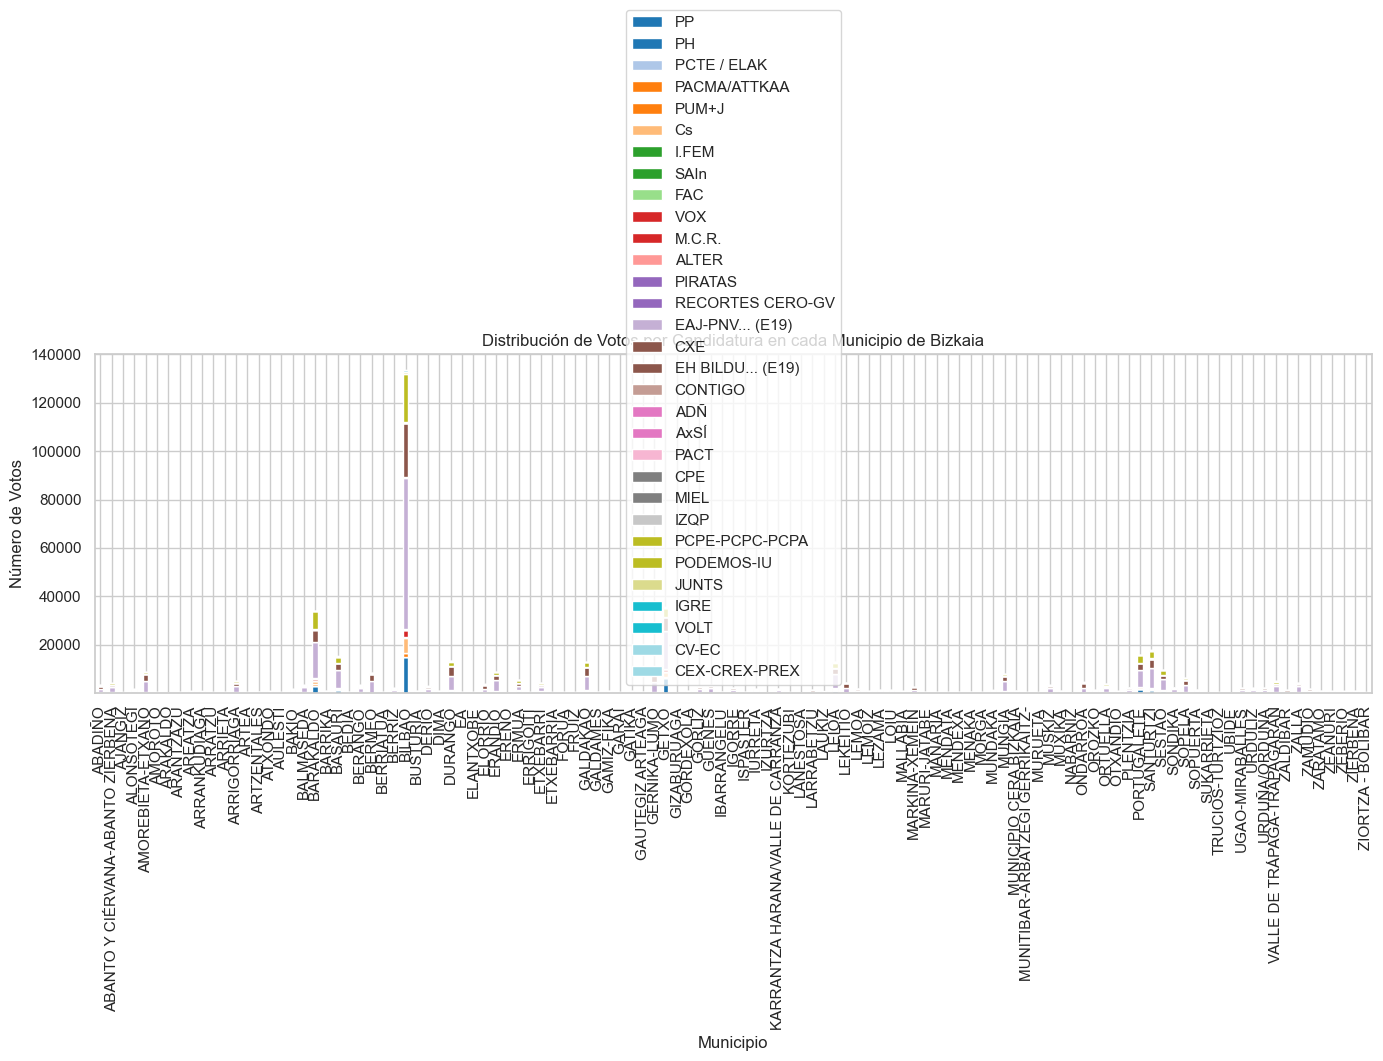

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame por el ámbito "Bizkaia"
df_bizkaia = df[df['TH'] == 'Bizkaia']

# Agrupar por municipio y sumar los votos por candidatura
df_bizkaia_municipios = df_bizkaia.groupby('Ámbito').sum().iloc[:, 11:]

# Crear el gráfico de barras apiladas
df_bizkaia_municipios.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribución de Votos por Candidatura en cada Municipio de Bizkaia')
plt.xlabel('Municipio')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


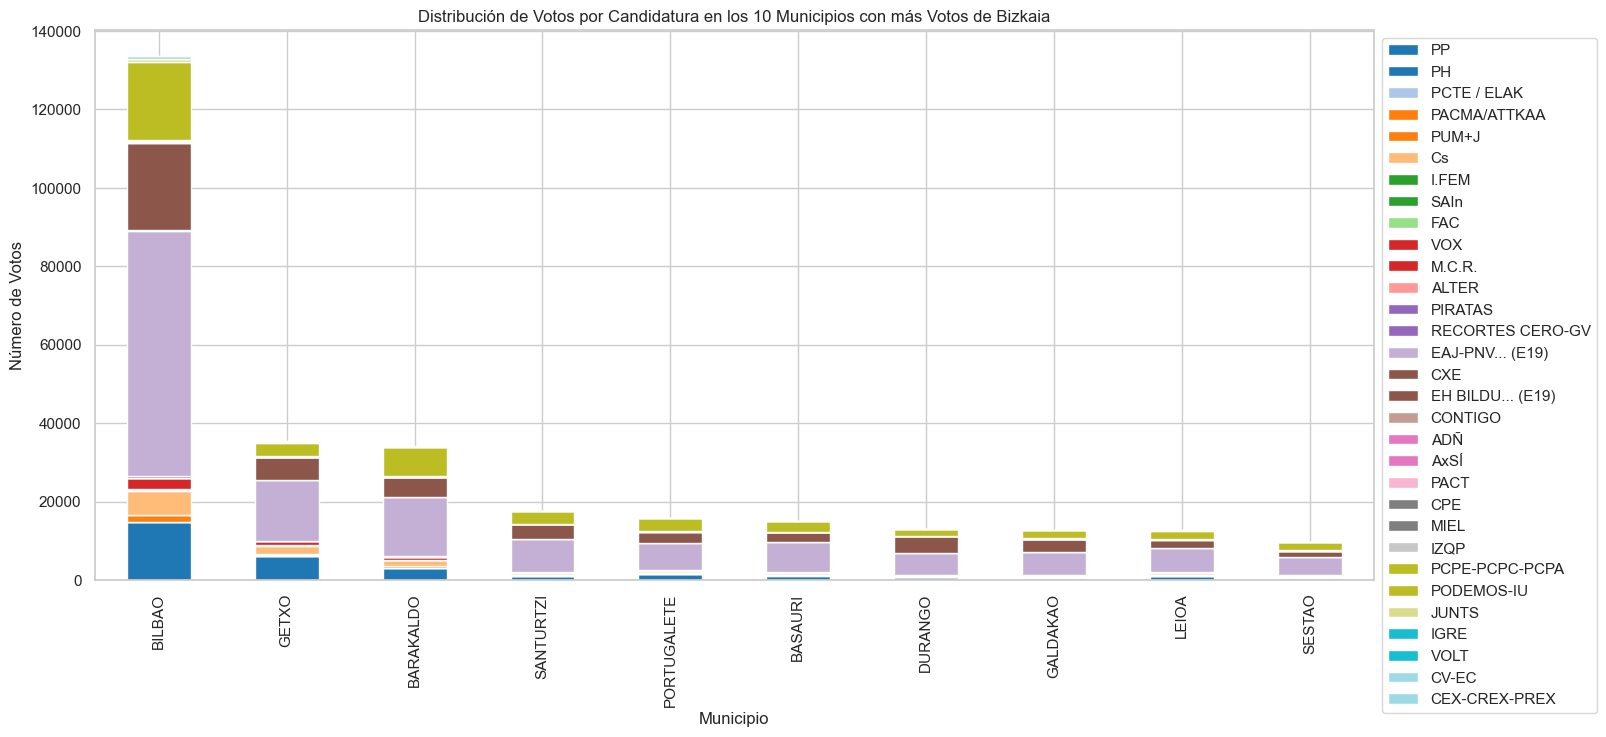

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame por el ámbito "Bizkaia"
df_bizkaia = df[df['TH'] == 'Bizkaia']

# Agrupar por municipio y sumar los votos por candidatura
df_bizkaia_municipios = df_bizkaia.groupby('Ámbito').sum().iloc[:, 11:]

# Calcular la suma total de votos para cada municipio
df_bizkaia_municipios['Total_Votos'] = df_bizkaia_municipios.sum(axis=1)

# Seleccionar los municipios con mas votos, selecciono los 10 con mas votos
top_municipios = df_bizkaia_municipios.nlargest(10, 'Total_Votos').drop(columns='Total_Votos')

# Crear el gráfico de barras apiladas
top_municipios.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribución de Votos por Candidatura en los 10 Municipios con más Votos de Bizkaia')
plt.xlabel('Municipio')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()

#mover la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#Mapa Bizkaia con votos por partido politico

In [286]:
import folium

# localizacion Bizkaia
bizkaia_map = folium.Map(location=[43.2977, -2.9859], zoom_start=10)

# Marcadores para Bilbao, Getxo, Barakaldo, Santurtzi, Portugalete, Basauri, Durango, Galdakao, Leioa y Sestao
locations = {
    "Bilbao": [43.2630, -2.9350],
    "Getxo": [43.3548, -3.0201],
    "Barakaldo": [43.2955, -2.9984],
    "Santurtzi": [43.3322, -3.0372],
    "Portugalete": [43.3193, -3.0206],
    "Basauri": [43.2385, -2.8874],
    "Durango": [43.1713, -2.6314],
    "Galdakao": [43.2336, -2.8258],
    "Leioa": [43.3253, -2.9864],
    "Sestao": [43.3092, -3.0076]
}

for location, coords in locations.items():
    folium.Marker(location=coords, popup=location).add_to(bizkaia_map)

# Mostrar el mapa
bizkaia_map


In [293]:
import folium

# Crear un mapa centrado en Bizkaia
bizkaia_map = folium.Map(location=[43.2977, -2.9859], zoom_start=10)

# Marcadores para Bilbao, Getxo, Barakaldo, Santurtzi, Portugalete, Basauri, Durango, Galdakao, Leioa y Sestao
locations = {
    "Bilbao": [43.2630, -2.9350],
    "Getxo": [43.3548, -3.0201],
    
}

# Datos de votos por partido (ejemplo)
votos_pp_vox = {
    "Bilbao": {"PP": 1000, "VOX": 500},
    "Getxo": {"PP": 800, "VOX": 300},
    # Agrega los datos para los demás municipios
}

for location, coords in locations.items():
    # Agregar marcador con información de votos
    popup_text = f"{location}\nPP: {votos_pp_vox[location]['PP']} votos\nVOX: {votos_pp_vox[location]['VOX']} votos"
    folium.Marker(location=coords, popup=popup_text).add_to(bizkaia_map)

# Mostrar el mapa
bizkaia_map


In [295]:
import folium

# Crear un mapa centrado en Bizkaia
bizkaia_map = folium.Map(location=[43.2977, -2.9859], zoom_start=10)

# Marcadores para Bilbao, Getxo, Barakaldo, Santurtzi, Portugalete, Basauri, Durango, Galdakao, Leioa y Sestao
locations = {
    "Bilbao": [43.2630, -2.9350],
    "Getxo": [43.3548, -3.0201]
    
}

# Datos de votos por partido (ejemplo)
votos_pp_vox = {
    "Bilbao": {"PP": df.loc[df['Ámbito'] == 'Bilbao', 'PP'].values[0], "VOX": df.loc[df['Ámbito'] == 'Bilbao', 'VOX'].values[0]},
    "Getxo": {"PP": df.loc[df['Ámbito'] == 'Getxo', 'PP'].values[0], "VOX": df.loc[df['Ámbito'] == 'Getxo', 'VOX'].values[0]},
    # Agrega los datos para los demás municipios
}

for location, coords in locations.items():
    # Agregar marcador con información de votos
    popup_text = f"{location}\nPP: {votos_pp_vox[location]['PP']} votos\nVOX: {votos_pp_vox[location]['VOX']} votos"
    folium.Marker(location=coords, popup=popup_text).add_to(bizkaia_map)

# Mostrar el mapa
bizkaia_map


IndexError: index 0 is out of bounds for axis 0 with size 0

#Votos en Gipuzkoa

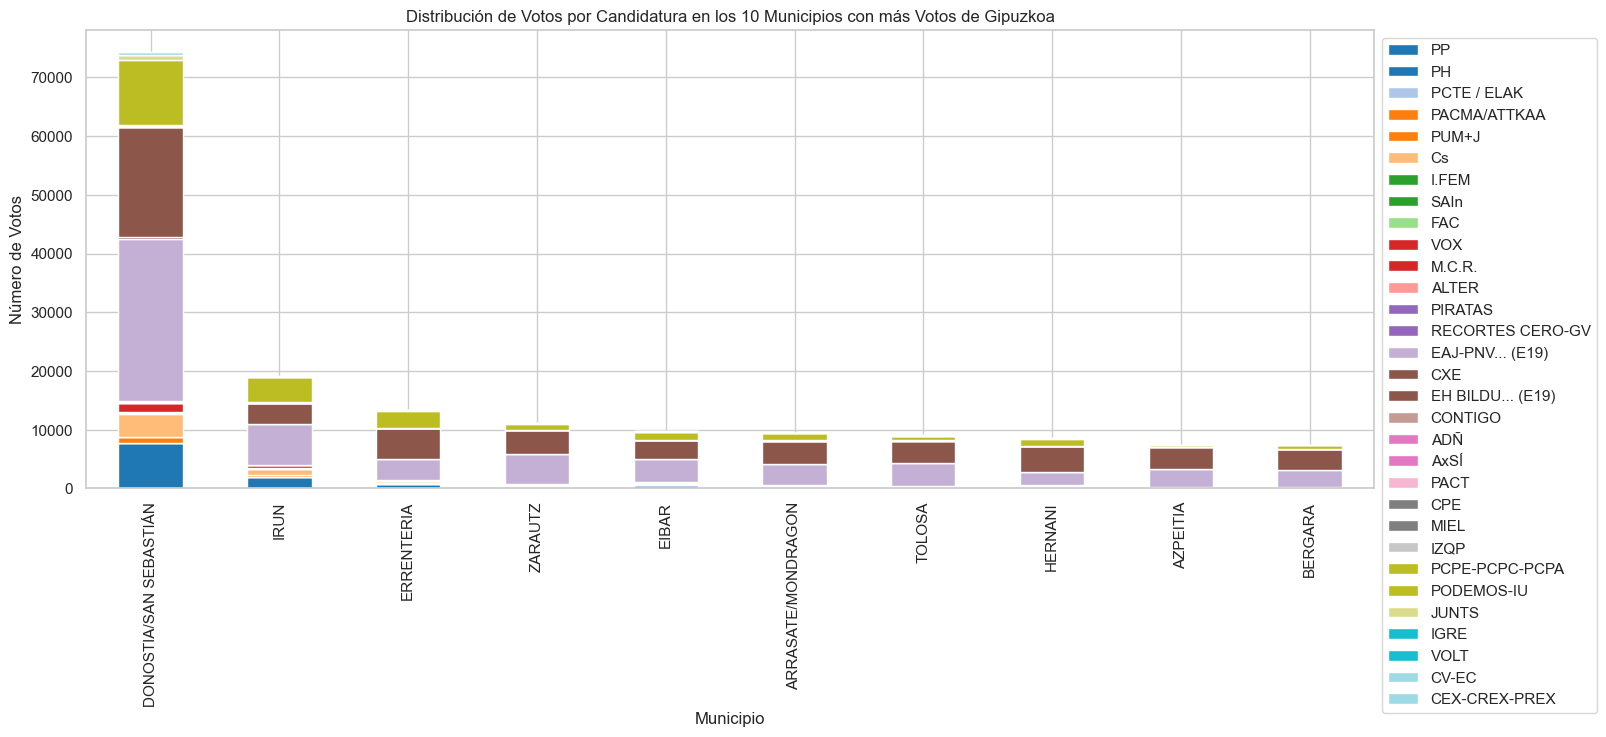

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame por el ámbito "Gipuzkoa"
df_gipuzkoa = df[df['TH'] == 'Gipuzkoa']

# Agrupar por municipio y sumar los votos por candidatura
df_gipuzkoa_municipios = df_gipuzkoa.groupby('Ámbito').sum().iloc[:, 11:]

# Calcular la suma total de votos para cada municipio
df_gipuzkoa_municipios['Total_Votos'] = df_gipuzkoa_municipios.sum(axis=1)

# Seleccionar los municipios con mas votos, selecciono los 10 con mas votos
top_municipios = df_gipuzkoa_municipios.nlargest(10, 'Total_Votos').drop(columns='Total_Votos')

# Crear el gráfico de barras apiladas
top_municipios.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribución de Votos por Candidatura en los 10 Municipios con más Votos de Gipuzkoa')
plt.xlabel('Municipio')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()

#mover la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#Mapa con votos de partidos


#Votos en Araba-Alava

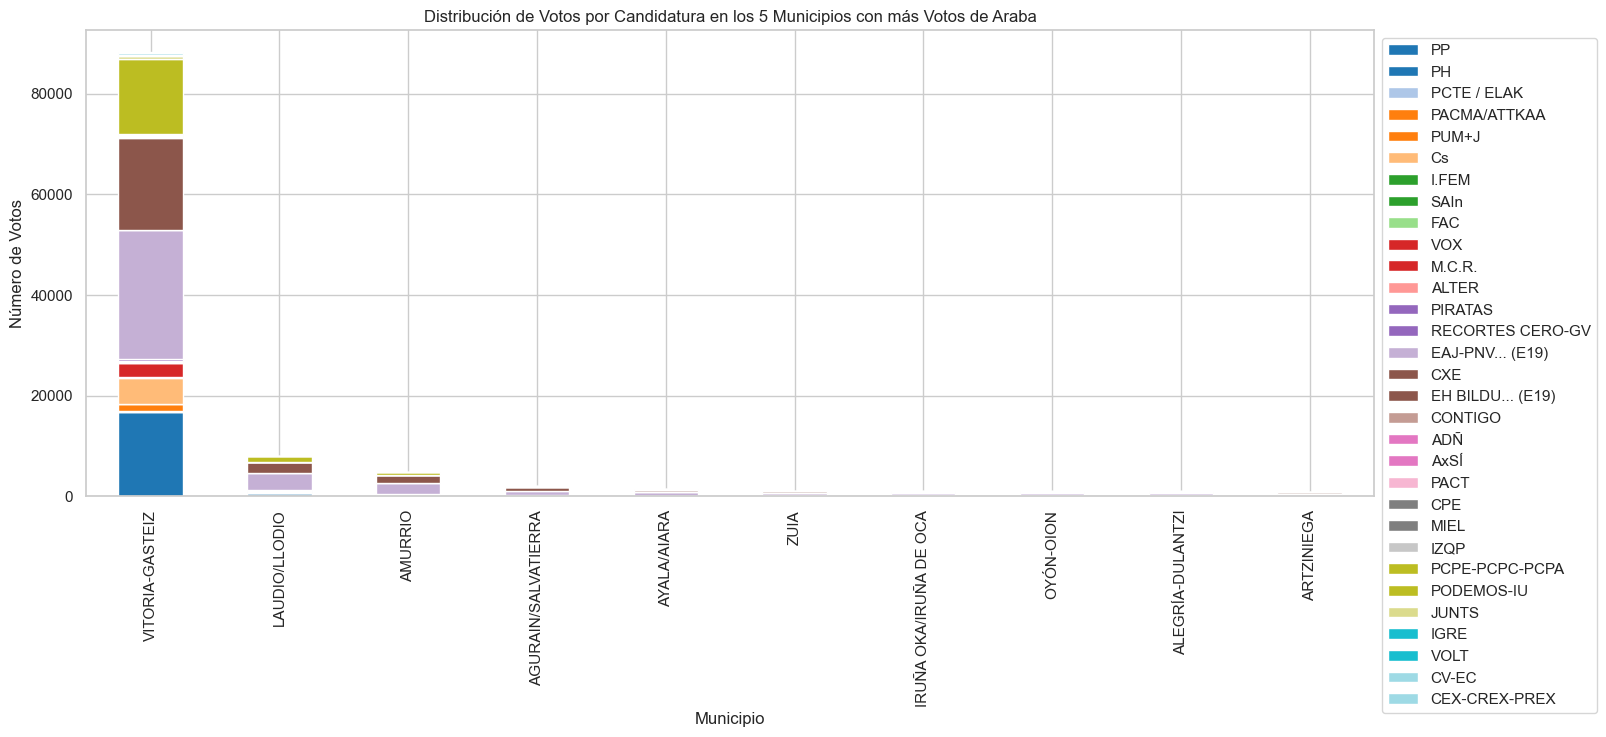

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame por el ámbito "Araba-Alava"
df_Araba = df[df['TH'] == 'Araba-Alava']

# Agrupar por municipio y sumar los votos por candidatura
df__municipios_Araba = df_Araba.groupby('Ámbito').sum().iloc[:, 11:]

# Calcular la suma total de votos para cada municipio
df__municipios_Araba['Total_Votos'] = df__municipios_Araba.sum(axis=1)

# Seleccionar los municipios con mas votos, selecciono los 10 con mas votos
top_municipios = df__municipios_Araba.nlargest(10, 'Total_Votos').drop(columns='Total_Votos')

# Crear el gráfico de barras apiladas
top_municipios.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribución de Votos por Candidatura en los 5 Municipios con más Votos de Araba')
plt.xlabel('Municipio')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()

#mover la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
